# Task 22-> Linear Regression from scratch

# Dataset 1: SAT-GPA

## Step 1: Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('1.01. Simple linear regression.csv')
x = data['SAT'].values
y = data['GPA'].values

print("SAT-GPA Dataset")
print("Shape:", data.shape)
data.head()

SAT-GPA Dataset
Shape: (84, 2)


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Simple two-point method
### Choose the first and last points to determine the line


In [2]:
x1, y1 = x[0], y[0]
x2, y2 = x[-1], y[-1]

### Calculate slope (m) and y-intercept (b)

In [3]:
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

### Make predictions using the simple linear model



In [4]:
y_pred = b + m * x
y_pred

array([2.4       , 2.19017857, 2.59303571, 2.27830357, 2.311875  ,
       2.21535714, 2.60982143, 2.60982143, 2.72732143, 2.97071429,
       2.488125  , 2.65598214, 2.488125  , 2.39160714, 2.64758929,
       3.06303571, 2.57205357, 2.23214286, 2.93714286, 2.70214286,
       2.59723214, 2.43357143, 2.18598214, 2.28669643, 3.49107143,
       2.87      , 2.70633929, 2.84901786, 3.68410714, 2.73571429,
       2.63080357, 3.32321429, 2.65598214, 2.99169643, 3.09660714,
       2.96651786, 2.79446429, 3.40714286, 2.664375  , 2.89098214,
       3.03366071, 2.97071429, 3.4575    , 2.34964286, 3.55821429,
       3.28544643, 2.86160714, 3.41553571, 3.00008929, 3.51205357,
       2.76928571, 2.99169643, 3.20991071, 2.06428571, 3.09241071,
       3.12598214, 2.46714286, 3.40294643, 2.68116071, 3.14276786,
       3.44910714, 2.79446429, 3.15116071, 3.77223214, 3.15116071,
       2.89517857, 2.97071429, 3.32321429, 3.016875  , 3.310625  ,
       3.31901786, 2.66857143, 3.49526786, 3.32321429, 3.68830

### Calculate metrics: Mean Squared Error, Root Mean Squared Error, and R-squared


In [5]:
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

### Printing Results

In [6]:
print("\nSimple Two-Point Method Results:")
print(f"Equation: y = {m:.4f}x + {b:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Simple Two-Point Method Results:
Equation: y = 0.0042x + -4.7927
MSE: 0.2569
RMSE: 0.5069
R-squared: -2.5242


### Plot the results


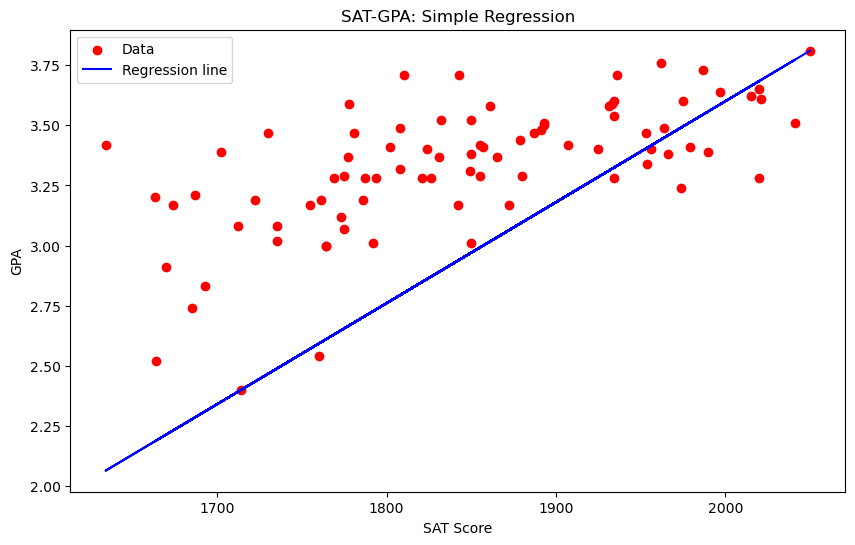

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data')
plt.plot(x, y_pred, color='blue', label='Regression line')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.title('SAT-GPA: Simple Regression')
plt.legend()
plt.show()

## Gradient Descent method
### Normalize the input features

In [8]:
x_norm = (x - np.mean(x)) / np.std(x)
X = np.column_stack((np.ones(len(x)), x_norm))
theta = np.zeros(2)  
alpha = 0.01  # Learning rate
iters = 1000  # Number of iterations
m = len(y)  # Number of training examples
costs = []  

### Perform gradient descent


In [9]:
for _ in range(iters):
    h = np.dot(X, theta)  # Compute predictions
    grad = np.dot(X.T, (h - y)) / m  # Compute gradient
    theta -= alpha * grad  # Update parameters
    cost = np.sum((h - y)**2) / (2 * m)  # Compute cost
    costs.append(cost)

### Extract slope and intercept from theta


In [10]:
b_gd, m_gd = theta

### Make predictions using the gradient descent model



In [11]:
y_pred_gd = b_gd + m_gd * x_norm
y_pred_gd

array([3.11275523, 3.0299744 , 3.18891359, 3.06474235, 3.07798728,
       3.0399081 , 3.19553606, 3.19553606, 3.24189332, 3.33791908,
       3.14752318, 3.21374784, 3.14752318, 3.109444  , 3.21043661,
       3.37434265, 3.18063551, 3.04653057, 3.32467415, 3.23195962,
       3.19056921, 3.12600016, 3.02831879, 3.06805358, 3.54321554,
       3.29818429, 3.23361524, 3.2899062 , 3.6193739 , 3.24520456,
       3.20381414, 3.47699088, 3.21374784, 3.34619717, 3.38758758,
       3.33626347, 3.26838319, 3.51010321, 3.21705907, 3.30646237,
       3.36275333, 3.33791908, 3.52997061, 3.09288783, 3.5697054 ,
       3.46209033, 3.29487305, 3.51341444, 3.3495084 , 3.55149362,
       3.25844949, 3.34619717, 3.43228923, 2.9803059 , 3.38593196,
       3.3991769 , 3.1392451 , 3.50844759, 3.22368154, 3.40579936,
       3.52665937, 3.26838319, 3.4091106 , 3.65414185, 3.4091106 ,
       3.30811799, 3.33791908, 3.47699088, 3.35613087, 3.47202403,
       3.47533526, 3.21871469, 3.54487116, 3.47699088, 3.62102

### Calculate metrics for gradient descent method


In [12]:
mse_gd = np.mean((y - y_pred_gd)**2)
rmse_gd = np.sqrt(mse_gd)
r2_gd = 1 - (np.sum((y - y_pred_gd)**2) / np.sum((y - np.mean(y))**2))

### Printing Results

In [13]:
print("\nGradient Descent Results:")
print(f"Equation: y = {m_gd:.4f}x + {b_gd:.4f}")
print(f"MSE: {mse_gd:.4f}")
print(f"RMSE: {rmse_gd:.4f}")
print(f"R-squared: {r2_gd:.4f}")


Gradient Descent Results:
Equation: y = 0.1720x + 3.3301
MSE: 0.0433
RMSE: 0.2081
R-squared: 0.4060


### Plot the results for gradient descent



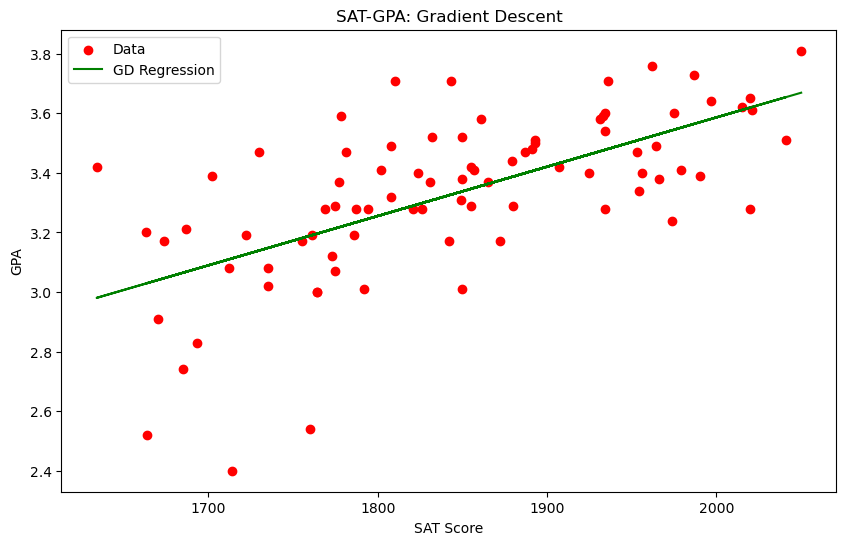

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data')
plt.plot(x, y_pred_gd, color='green', label='GD Regression')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.title('SAT-GPA: Gradient Descent')
plt.legend()
plt.show()

### Plot cost history


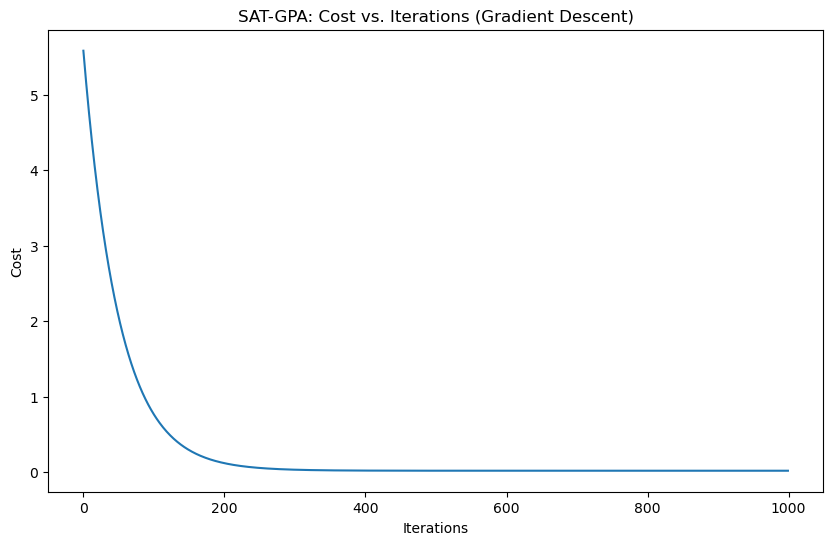

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('SAT-GPA: Cost vs. Iterations (Gradient Descent)')
plt.show()

# Dataset 2: Head Size-Brain Weight

### Load the data


In [16]:
data = pd.read_csv('dataset.csv')
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

print("\nHead Size-Brain Weight Dataset")
print("Shape:", data.shape)
data.head()


Head Size-Brain Weight Dataset
Shape: (237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


## Simple two-point method
### Choose the first and last points to determine the line


In [17]:
x1, y1 = x[0], y[0]
x2, y2 = x[-1], y[-1]

### Calculate slope (m) and y-intercept (b)


In [18]:
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

### Make predictions using the simple linear model


In [19]:
y_pred = b + m * x
y_pred

array([1530.        , 1246.91347012, 1438.19803747, 1261.17752007,
       1407.47546833, 1190.95450491, 1264.10347904, 1181.44513827,
       1201.19536128, 1336.15521855, 1139.01873327, 1340.17841213,
       1211.07047279, 1418.81355932, 1281.29348796, 1297.38626227,
       1158.76895629, 1147.4308653 , 1011.73951829, 1497.81445138,
       1298.11775201, 1359.56289028, 1271.05263158, 1236.67261374,
       1615.9500446 , 1497.44870651, 1355.90544157, 1350.78501338,
       1143.04192685, 1406.74397859, 1264.83496878, 1268.12667261,
       1380.4103479 , 1401.6235504 , 1400.52631579, 1274.71008029,
       1169.74130241, 1250.57091882, 1099.15254237, 1156.94023194,
       1328.84032114, 1161.69491525, 1457.94826048, 1271.05263158,
       1292.63157895, 1355.17395183, 1455.38804639, 1037.34165923,
       1211.43621766, 1212.53345227, 1302.87243533, 1267.029438  ,
       1441.4897413 , 1365.78055308, 1347.12756467, 1144.50490633,
       1302.50669045, 1403.45227475, 1318.96520963, 1221.67707

### Calculate metrics: Mean Squared Error, Root Mean Squared Error, and R-squared


In [20]:
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

### Printing Results

In [21]:
print("\nSimple Two-Point Method Results:")
print(f"Equation: y = {m:.4f}x + {b:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Simple Two-Point Method Results:
Equation: y = 0.3657x + -120.2409
MSE: 12068.2252
RMSE: 109.8555
R-squared: 0.1631


### Plot the results


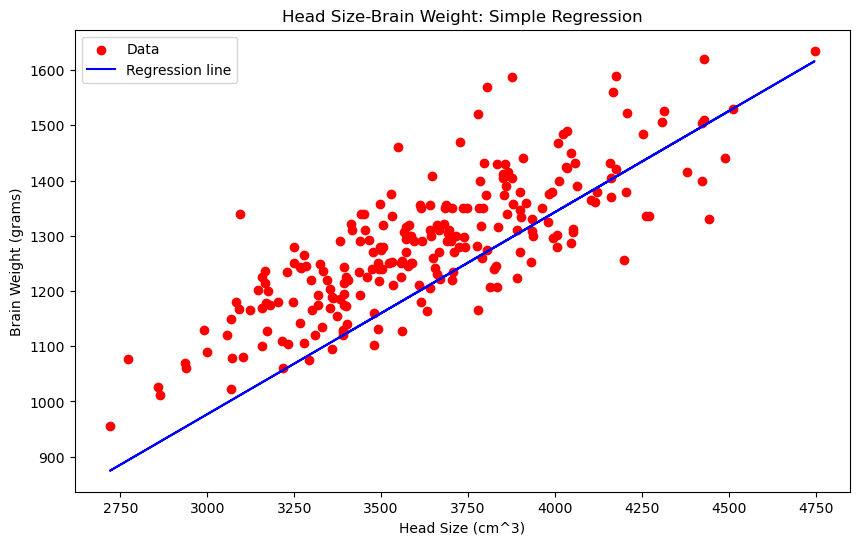

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data')
plt.plot(x, y_pred, color='blue', label='Regression line')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Head Size-Brain Weight: Simple Regression')
plt.legend()
plt.show()

## Gradient Descent method
### Normalize the input features


In [23]:
x_norm = (x - np.mean(x)) / np.std(x)
X = np.column_stack((np.ones(len(x)), x_norm))
theta = np.zeros(2)  
alpha = 0.01  # Learning rate
iters = 1000  # Number of iterations
m = len(y)  # Number of training examples
costs = [] 

### Perform gradient descent


In [24]:
for _ in range(iters):
    h = np.dot(X, theta)  # Compute predictions
    grad = np.dot(X.T, (h - y)) / m  # Compute gradient
    theta -= alpha * grad  # Update parameters
    cost = np.sum((h - y)**2) / (2 * m)  # Compute cost
    costs.append(cost)

### Extract slope and intercept from theta


In [25]:
b_gd, m_gd = theta

### Make predictions using the gradient descent model


In [26]:
y_pred_gd = b_gd + m_gd * x_norm
y_pred_gd

array([1514.10123236, 1310.21572597, 1447.98332267, 1320.48902668,
       1425.85621345, 1269.91277703, 1322.59637042, 1263.06390989,
       1277.28848011, 1374.4897099 , 1232.50742573, 1377.38730754,
       1284.40076521, 1434.02217042, 1334.97701486, 1346.56740541,
       1246.73199594, 1238.56603897, 1140.83797324, 1490.92045128,
       1347.09424134, 1391.34845978, 1327.60131179, 1302.8400229 ,
       1576.00445459, 1490.65703331, 1388.71428011, 1385.02642858,
       1235.40502337, 1425.32937751, 1323.12320635, 1325.49396805,
       1406.3632839 , 1421.64152598, 1420.85127208, 1330.23549146,
       1254.63453495, 1312.84990564, 1203.79486734, 1245.41490611,
       1369.22135056, 1248.83933968, 1462.20789288, 1327.60131179,
       1343.14297184, 1388.18744418, 1460.36396711, 1159.27723093,
       1284.66418318, 1285.45443708, 1350.51867491, 1324.70371415,
       1450.35408437, 1395.82656522, 1382.39224891, 1236.45869523,
       1350.25525694, 1422.95861581, 1362.10906545, 1292.03988

### Calculate metrics for gradient descent method


In [27]:
mse_gd = np.mean((y - y_pred_gd)**2)
rmse_gd = np.sqrt(mse_gd)
r2_gd = 1 - (np.sum((y - y_pred_gd)**2) / np.sum((y - np.mean(y))**2))

### Printing Results

In [28]:
print("\nGradient Descent Results:")
print(f"Equation: y = {m_gd:.4f}x + {b_gd:.4f}")
print(f"MSE: {mse_gd:.4f}")
print(f"RMSE: {rmse_gd:.4f}")
print(f"R-squared: {r2_gd:.4f}")


Gradient Descent Results:
Equation: y = 96.0132x + 1282.8180
MSE: 5201.3871
RMSE: 72.1206
R-squared: 0.6393


### Plot the results for gradient descent


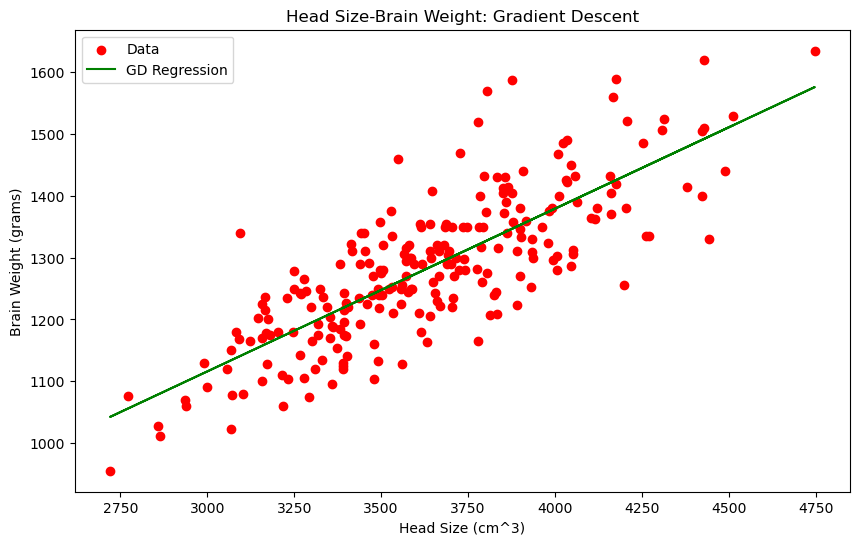

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data')
plt.plot(x, y_pred_gd, color='green', label='GD Regression')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Head Size-Brain Weight: Gradient Descent')
plt.legend()
plt.show()

### Plot the cost history


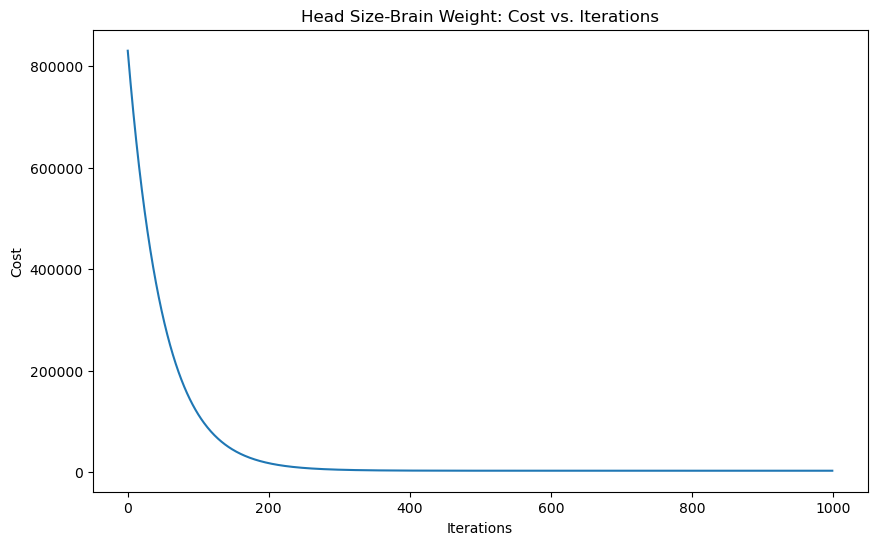

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Head Size-Brain Weight: Cost vs. Iterations')
plt.show()

## Years Experience-Salary Dataset
### Load the data


In [31]:
data = pd.read_csv('Salary_dataset.csv')
x = data['YearsExperience'].values
y = data['Salary'].values

print("\nYears Experience-Salary Dataset")
print("Shape:", data.shape)
data.head()


Years Experience-Salary Dataset
Shape: (30, 3)


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## Simple two-point method
### Choose the first and last points to determine the line


In [32]:
x1, y1 = x[0], y[0]
x2, y2 = x[-1], y[-1]

### Calculate slope (m) and y-intercept (b)


In [33]:
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

### Make predictions using the simple linear model


In [34]:
y_pred = b + m * x
y_pred

array([ 39344.        ,  41099.93617021,  42855.87234043,  47245.71276596,
        49001.64893617,  55147.42553191,  56025.39361702,  57781.32978723,
        57781.32978723,  62171.17021277,  63927.10638298,  64805.07446809,
        64805.07446809,  65683.04255319,  69194.91489362,  72706.78723404,
        74462.72340426,  76218.65957447,  81486.46808511,  82364.43617021,
        89388.18085106,  92022.08510638,  99045.82978723, 101679.73404255,
       106069.57446809, 108703.4787234 , 113093.31914894, 113971.28723404,
       120117.06382979, 121873.        ])

### Calculate metrics: Mean Squared Error, Root Mean Squared Error, and R-squared


In [35]:
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

### Printing Results

In [36]:
print("\nSimple Two-Point Method Results:")
print(f"Equation: y = {m:.4f}x + {b:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Simple Two-Point Method Results:
Equation: y = 8779.6809x + 28808.3830
MSE: 34878684.4735
RMSE: 5905.8178
R-squared: 0.9520


### Plot the results


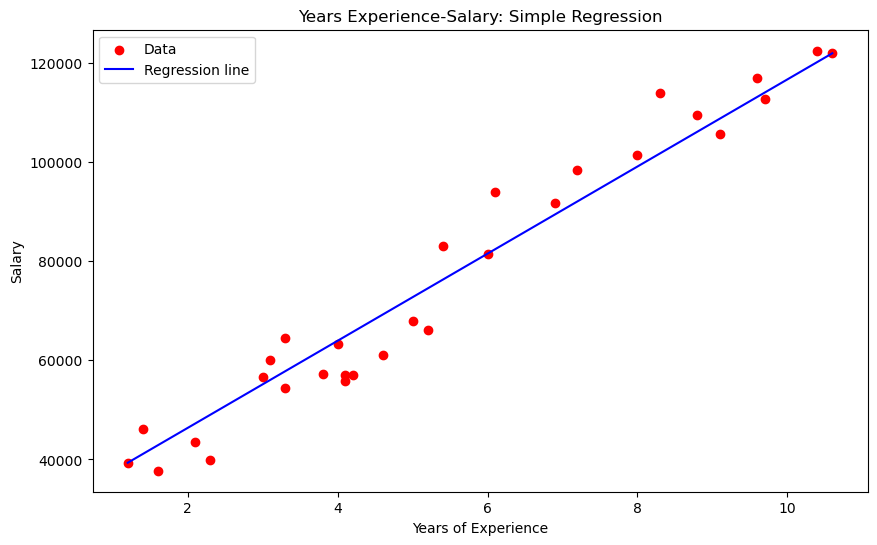

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data')
plt.plot(x, y_pred, color='blue', label='Regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years Experience-Salary: Simple Regression')
plt.legend()
plt.show()

## Gradient Descent method
### Normalize the input features


In [38]:
x_norm = (x - np.mean(x)) / np.std(x)
X = np.column_stack((np.ones(len(x)), x_norm))
theta = np.zeros(2) 
alpha = 0.01  # Learning rate
iters = 1000  # Number of iterations
m = len(y)  # Number of training examples
costs = []  

### Perform gradient descent


In [39]:
for _ in range(iters):
    h = np.dot(X, theta)  # Compute predictions
    grad = np.dot(X.T, (h - y)) / m  # Compute gradient
    theta -= alpha * grad  # Update parameters
    cost = np.sum((h - y)**2) / (2 * m)  # Compute cost
    costs.append(cost)

### Extract slope and intercept from theta


In [40]:
b_gd, m_gd = theta

### Make predictions using the gradient descent model


In [41]:
y_pred_gd = b_gd + m_gd * x_norm
y_pred_gd

array([ 36186.59646431,  38076.50733527,  39966.41820623,  44691.19538363,
        46581.10625459,  53195.79430294,  54140.74973842,  56030.66060938,
        56030.66060938,  60755.43778678,  62645.34865774,  63590.30409322,
        63590.30409322,  64535.2595287 ,  68315.08127061,  72094.90301253,
        73984.81388349,  75874.72475445,  81544.45736732,  82489.4128028 ,
        90049.05628664,  92883.92259308, 100443.56607691, 103278.43238335,
       108003.20956075, 110838.07586718, 115562.85304458, 116507.80848006,
       123122.49652842, 125012.40739938])

### Calculate metrics for gradient descent method


In [42]:
mse_gd = np.mean((y - y_pred_gd)**2)
rmse_gd = np.sqrt(mse_gd)
r2_gd = 1 - (np.sum((y - y_pred_gd)**2) / np.sum((y - np.mean(y))**2))

### Printing Results

In [43]:
print("\nGradient Descent Results:")
print(f"Equation: y = {m_gd:.4f}x + {b_gd:.4f}")
print(f"MSE: {mse_gd:.4f}")
print(f"RMSE: {rmse_gd:.4f}")
print(f"R-squared: {r2_gd:.4f}")


Gradient Descent Results:
Equation: y = 26366.0441x + 76000.7188
MSE: 31270963.7842
RMSE: 5592.0447
R-squared: 0.9570


### Plot the results for gradient descent


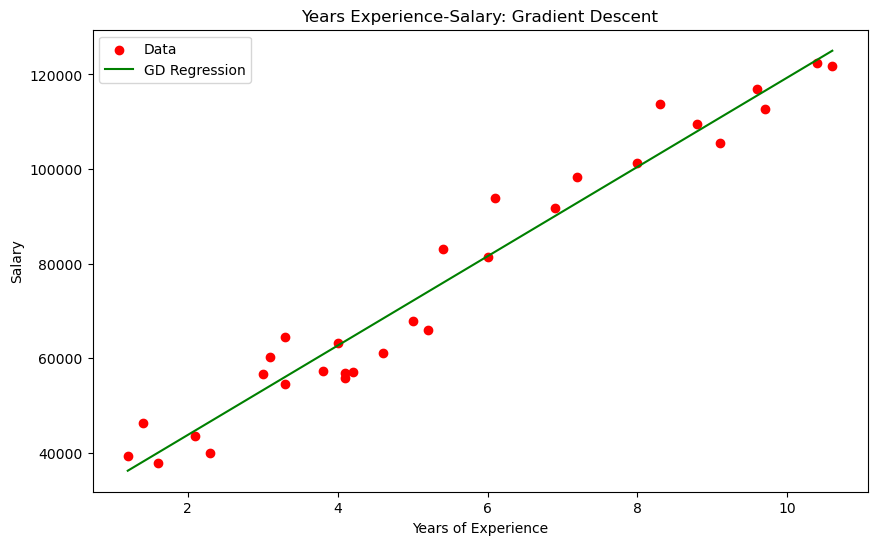

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data')
plt.plot(x, y_pred_gd, color='green', label='GD Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years Experience-Salary: Gradient Descent')
plt.legend()
plt.show()

### Plot the cost history


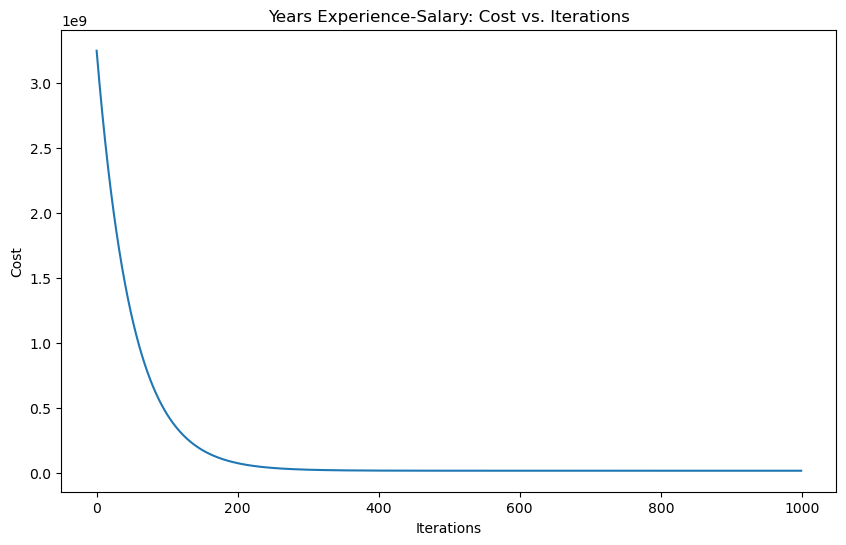

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Years Experience-Salary: Cost vs. Iterations')
plt.show()